In [1]:
import spacy

In [2]:
nlp = spacy.load("en_core_web_sm")
text = "West Chestertenfieldville was referenced in Mr. Deeds."
doc = nlp(text)

In [3]:
for ent in doc.ents:
    print(ent.text, ent.label_)

West Chestertenfieldville LOC
Deeds PERSON


so in the tutorial West Chestertenfieldville was classified as a PERSON and now its LOC which is an improvement. 

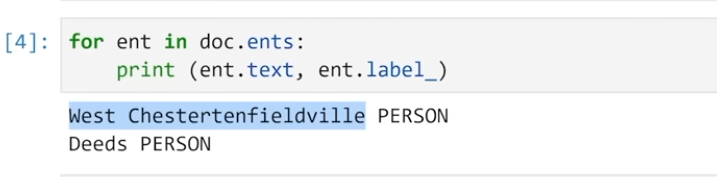

But because there is no problem with the classification, we can't really fix that with an entity ruler. so lets think of another problem.

In [4]:
doc = nlp("Murderbot said, 'The humans think I'm mean. Wait until they meet you.'")

for ent in doc.ents:
    print(ent.text, ent.label_)

Murderbot PERSON


Should i be happy that it didn't make a mistake or sad?

In [5]:
doc = nlp("ART was built at the Pansystem University of Mihira and New Tideland.")
for ent in doc.ents:
    print(ent.text, ent.label_)

ART ORG
the Pansystem University ORG
New Tideland GPE


Okay finally a mistake but honestly i deliberately framed that sentence so it mistakes ART for a non-person. Thats a problem i'm happy to fix.

# Make a ruler to correct this problem

In [6]:
ruler = nlp.add_pipe("entity_ruler")


In [7]:
nlp.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc',
    'pos_acc',
    'tag_micro_p',
    'tag_micro_r',
    'tag_micro_f'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'entity_ruler': {'assigns': ['doc.ents', 'token.ent_

Now the 'entity_ruler' is the final pipe in our pipeline

In [8]:
patterns = [
    {"label": "PERSON", "pattern": "ART"}
]

In [9]:
ruler.add_patterns(patterns)

In [10]:
doc2 = nlp("ART was built at the Pansystem University of Mihira and New Tideland.")
for ent in doc2.ents:
    print(ent.text, ent.label_)

ART ORG
the Pansystem University ORG
New Tideland GPE


Why no change? because the `entity_ruler` comes after `ner` in the pipeline.

So lets put it in the right place in the pipeline.

In [11]:
nlp2 = spacy.load("en_core_web_sm")
ruler = nlp2.add_pipe("entity_ruler", before="ner")

In [12]:
ruler.add_patterns(patterns)

In [13]:
doc = nlp2("ART was built at the Pansystem University of Mihira and New Tideland.")
for ent in doc.ents:
    print(ent.text, ent.label_)

ART PERSON
the Pansystem University ORG
New Tideland GPE


HA!

In [14]:
nlp2.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc',
    'pos_acc',
    'tag_micro_p',
    'tag_micro_r',
    'tag_micro_f'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'entity_ruler': {'assigns': ['doc.ents', 'token.ent_type', 'token.ent_iob'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_

now `ner` is last.

Now you know what? i don't like how Mihira is being ignored. so lets do something about that.

In [15]:
nlp3 = spacy.load("en_core_web_sm")
ruler = nlp3.add_pipe("entity_ruler", before="ner")

In [16]:
patterns = [
    {"label": "PERSON", "pattern": "ART"},
    {"label": "GPE", "pattern": "Mihira"},
    {"label": "GPE", "pattern": "New Tideland"}]

In [17]:
ruler.add_patterns(patterns)

In [18]:
doc = nlp3("ART was built at the Pansystem University of Mihira and New Tideland.")
for ent in doc.ents:
    print(ent.text, ent.label_)

ART PERSON
the Pansystem University ORG
Mihira GPE
New Tideland GPE


Way Better!